In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import tensorflow as tf
from tensorflow.python.framework import ops
ops.reset_default_graph()

sess = tf.Session()
batch_size = 25

In [2]:
# Create data
x_vals = np.random.normal(1, 0.1, 100)
y_vals = np.repeat(10., 100)
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Split data into train/test = 80%/20%
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace = False)
test_indices = np.array(list(set(range(len(x_vals)))-set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [6]:
# model
A = tf.Variable(tf.random_normal(shape=[1,1]))
my_output = tf.matmul(x_data, A)

# L2 loss
loss = tf.reduce_mean(tf.square(my_output - y_target))

my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

for i in range(200):
    rand_index = np.random.choice(len(x_vals_train),size = batch_size)
    rand_x = np.transpose([x_vals_train[rand_index]])
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    if (i+1) % 25 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(loss, feed_dict={x_data:rand_x, y_target:rand_y})))
    

Step #25 A = [[ 6.61085081]]
Loss = 13.5053
Step #50 A = [[ 8.78522873]]
Loss = 2.66852
Step #75 A = [[ 9.63144112]]
Loss = 1.96806
Step #100 A = [[ 9.89662838]]
Loss = 1.08989
Step #125 A = [[ 9.99544239]]
Loss = 0.913431
Step #150 A = [[ 10.02685261]]
Loss = 0.64179
Step #175 A = [[ 10.08765507]]
Loss = 1.35778
Step #200 A = [[ 10.09835529]]
Loss = 0.993264


In [8]:
# Evaluate accuracy (loss) on test set
mse_test = sess.run(loss, feed_dict={x_data:np.transpose([x_vals_test]), y_target:np.transpose([y_vals_test])})
mse_train = sess.run(loss, feed_dict={x_data:np.transpose([x_vals_train]), y_target:np.transpose([y_vals_train])})
print('MSE on test:' + str(np.round(mse_test, 2)))
print('MSE on train:' + str(np.round(mse_train,2)))

MSE on test:0.71
MSE on train:1.02


In [2]:
# classification 
ops.reset_default_graph()
sess = tf.Session()
batch_size = 25

# Create data
x_vals = np.concatenate((np.random.normal(-1, 1, 50), np.random.normal(2, 1, 50)))
y_vals = np.concatenate((np.repeat(0., 50), np.repeat(1., 50)))
x_data = tf.placeholder(shape=[1, None], dtype=tf.float32)
y_target = tf.placeholder(shape=[1, None], dtype=tf.float32)

# Split data into train/test = 80%/20%
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [3]:
# Create variable (one model parameter = A)
A = tf.Variable(tf.random_normal(mean=10, shape=[1]))
my_output = tf.add(x_data, A)


# Add classification loss (cross entropy)
xentropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels = my_output, logits = y_target))

# Create Optimizer
my_opt = tf.train.GradientDescentOptimizer(0.02)
train_step = my_opt.minimize(xentropy)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

In [5]:
# Run loop
for i in range(1800):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = [x_vals_train[rand_index]]
    rand_y = [y_vals_train[rand_index]]
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    if (i+1)%200==0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)))
        print('Loss = ' + str(sess.run(xentropy, feed_dict={x_data: rand_x, y_target: rand_y})))
        
# Evaluate Predictions on test set
y_prediction = tf.squeeze(tf.round(tf.nn.sigmoid(tf.matmul(x_data, A))))
correct_prediction = tf.equal(y_prediction, y_target)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
acc_value_test = sess.run(accuracy, feed_dict={x_data: [x_vals_test], y_target: [y_vals_test]})
acc_value_train = sess.run(accuracy, feed_dict={x_data: [x_vals_train], y_target: [y_vals_train]})
print('Accuracy on train set: ' + str(acc_value_train))
print('Accuracy on test set: ' + str(acc_value_test))

# Plot classification result
A_result = -sess.run(A)
print(A_result)
bins = np.linspace(-5, 5, 50)
plt.hist(x_vals[0:50], bins, alpha=0.5, label='N(-1,1)', color='blue')
plt.hist(x_vals[50:100], bins[0:50], alpha=0.5, label='N(2,1)', color='red')
plt.plot((A_result, A_result), (0, 8), 'k--', linewidth=3, label='A = '+ str(np.round(A_result, 2)))
plt.legend(loc='upper right')
plt.title('Binary Classifier, Accuracy=' + str(np.round(acc_value_test, 2)))
plt.show()

Step #200 A = [ 30.1909008]
Loss = -11.8286
Step #400 A = [ 32.43169022]
Loss = -16.9418
Step #600 A = [ 34.68848038]
Loss = -16.5173
Step #800 A = [ 36.89966965]
Loss = -20.67
Step #1000 A = [ 39.08288956]
Loss = -23.7222
Step #1200 A = [ 41.28289413]
Loss = -21.5952
Step #1400 A = [ 43.45008087]
Loss = -29.5539
Step #1600 A = [ 45.59090042]
Loss = -23.9662
Step #1800 A = [ 47.80928802]
Loss = -28.5916


ValueError: Shape must be rank 2 but is rank 1 for 'MatMul' (op: 'MatMul') with input shapes: [1,?], [1].

Accuracy on train set: 0.4875
Accuracy on test set: 0.55
[-98.1003418]


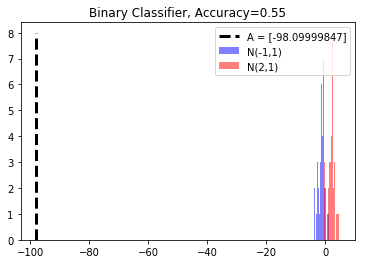